<a href="https://colab.research.google.com/github/zyzdon1/Stock-predictions/blob/main/stock_pre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [143]:
import pandas as pd
#import pandans

In [144]:
data = pd.read_csv('/upload_DJIA_table.csv')

df = pd.DataFrame(data)


In [145]:
column = df.columns
column

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [146]:
df_shape = df.shape
df_shape

(1989, 7)

In [147]:
first_5 = df.head()
first_5

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [148]:
#data info
info = df.info()
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1989 non-null   object 
 1   Open       1989 non-null   float64
 2   High       1989 non-null   float64
 3   Low        1989 non-null   float64
 4   Close      1989 non-null   float64
 5   Volume     1989 non-null   int64  
 6   Adj Close  1989 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 108.9+ KB


In [149]:
#describe
desc = df.describe()
desc

,Open,High,Low,Close,Volume,Adj Close
count,1989.000000,1989.000000,1989.000000,1989.000000,1.989000e+03,1989.000000
mean,13459.116048,13541.303173,13372.931728,13463.032255,1.628110e+08,13463.032255
std,3143.281634,3136.271725,3150.420934,3144.006996,9.392343e+07,3144.006996
min,6547.009766,6709.609863,6469.950195,6547.049805,8.410000e+06,6547.049805
25%,10907.339844,11000.980469,10824.759766,10913.379883,1.000000e+08,10913.379883
50%,13022.049805,13088.110352,12953.129883,13025.580078,1.351700e+08,13025.580078
75%,16477.699219,16550.070312,16392.769531,16478.410156,1.926000e+08,16478.410156
max,18315.060547,18351.359375,18272.560547,18312.390625,6.749200e+08,18312.390625


In [150]:
null_data = df.isnull()
null_data

,Date,Open,High,Low,Close,Volume,Adj Close
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1984,False,False,False,False,False,False,False
1985,False,False,False,False,False,False,False
1986,False,False,False,False,False,False,False
1987,False,False,False,False,False,False,False


In [151]:

df.drop(['Volume','Adj Close'], axis=1, inplace =True)

In [152]:
df.head()

,Date,Open,High,Low,Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234


In [153]:
#splitting date by day,month and year
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.dayofweek
days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}

df['Day'] = df['Day'].apply(lambda x: days[x])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [154]:
df

,Date,Open,High,Low,Close,Day,Month,Year
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,Fri,7,2016
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,Thurs,6,2016
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,Weds,6,2016
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,Tues,6,2016
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,Mon,6,2016
...,...,...,...,...,...,...,...,...
1984,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,Thurs,8,2008
1985,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,Weds,8,2008
1986,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,Tues,8,2008
1987,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,Mon,8,2008


In [156]:
df =df.drop(columns = 'Date')

In [157]:
df

,Open,High,Low,Close,Day,Month,Year
0,17924.240234,18002.380859,17916.910156,17949.369141,Fri,7,2016
1,17712.759766,17930.609375,17711.800781,17929.990234,Thurs,6,2016
2,17456.019531,17704.509766,17456.019531,17694.679688,Weds,6,2016
3,17190.509766,17409.720703,17190.509766,17409.720703,Tues,6,2016
4,17355.210938,17355.210938,17063.080078,17140.240234,Mon,6,2016
...,...,...,...,...,...,...,...
1984,11532.070312,11718.280273,11450.889648,11615.929688,Thurs,8,2008
1985,11632.809570,11633.780273,11453.339844,11532.959961,Weds,8,2008
1986,11781.700195,11782.349609,11601.519531,11642.469727,Tues,8,2008
1987,11729.669922,11867.110352,11675.530273,11782.349609,Mon,8,2008


In [158]:
import matplotlib.pyplot as plt


<function matplotlib.pyplot.show>

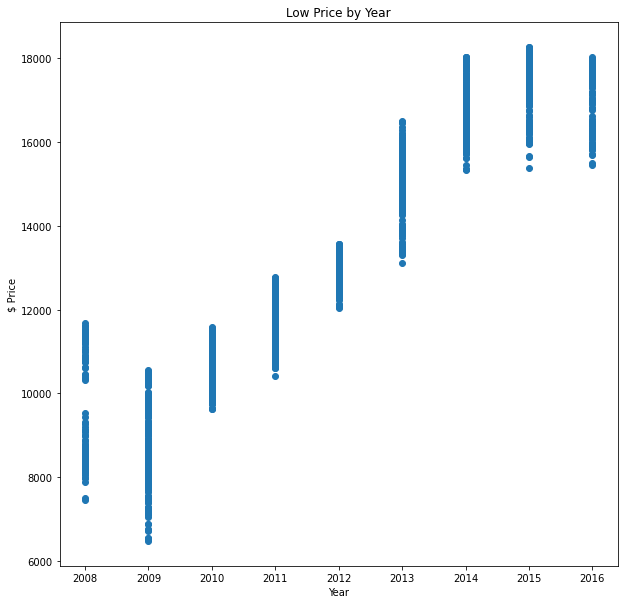

In [178]:
plt.figure(figsize=(10,10))
plt.scatter(df['Year'], df['Low'])
plt.xlabel("Year")
plt.ylabel("$ Price")
plt.title('Low Price by Year')
plt.show

<function matplotlib.pyplot.show>

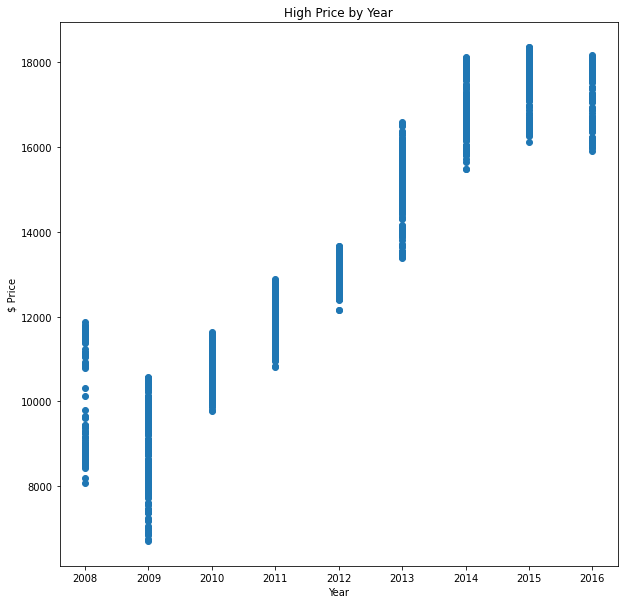

In [179]:
plt.figure(figsize=(10,10))
plt.scatter(df['Year'], df['High'])
plt.xlabel("Year")
plt.ylabel("$ Price")
plt.title('High Price by Year')
plt.show

<function matplotlib.pyplot.show>

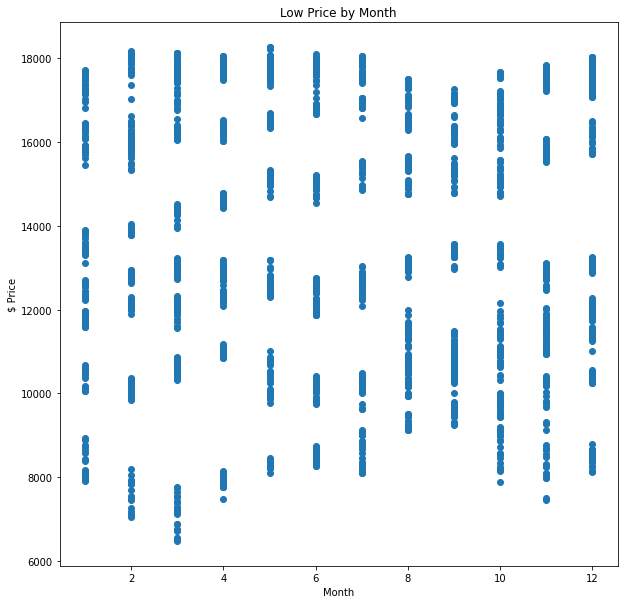

In [185]:
plt.figure(figsize=(10,10))
plt.scatter(df['Month'], df['Low'])
plt.xlabel("Month")
plt.ylabel("$ Price")
plt.title('Low Price by Month')
plt.show

<function matplotlib.pyplot.show>

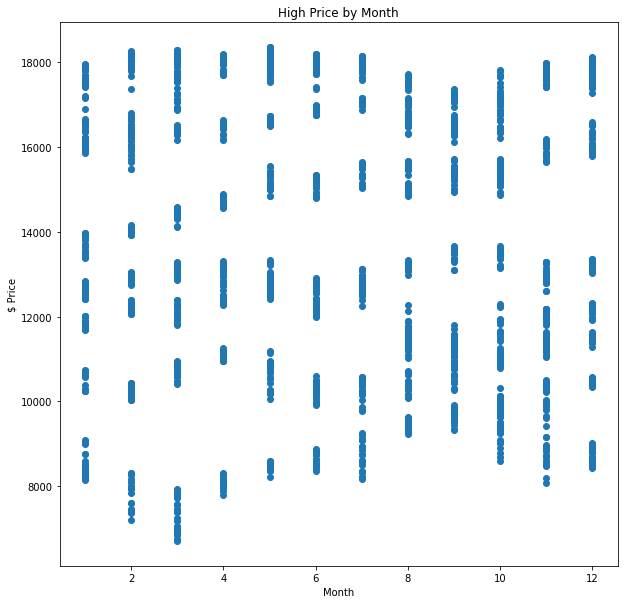

In [184]:
plt.figure(figsize=(10,10))
plt.scatter(df['Month'], df['High'])
plt.xlabel("Month")
plt.ylabel("$ Price")
plt.title('High Price by Month')
plt.show

<function matplotlib.pyplot.show>

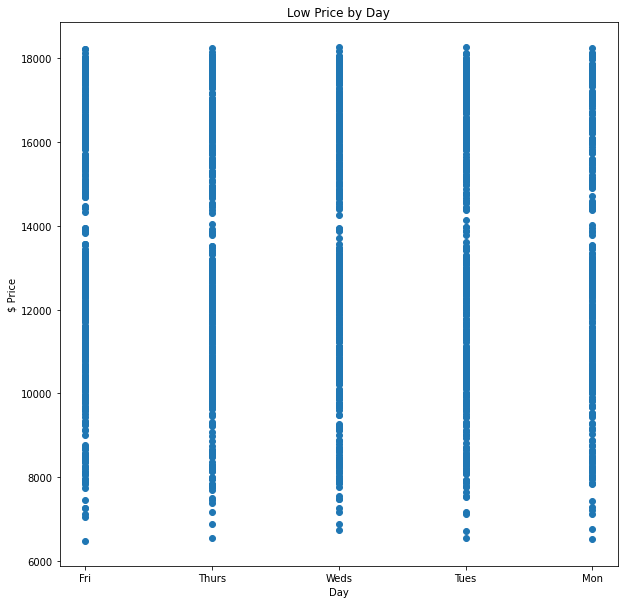

In [187]:
plt.figure(figsize=(10,10))
plt.scatter(df['Day'], df['Low'])
plt.xlabel("Day")
plt.ylabel("$ Price")
plt.title('Low Price by Day')
plt.show

<function matplotlib.pyplot.show>

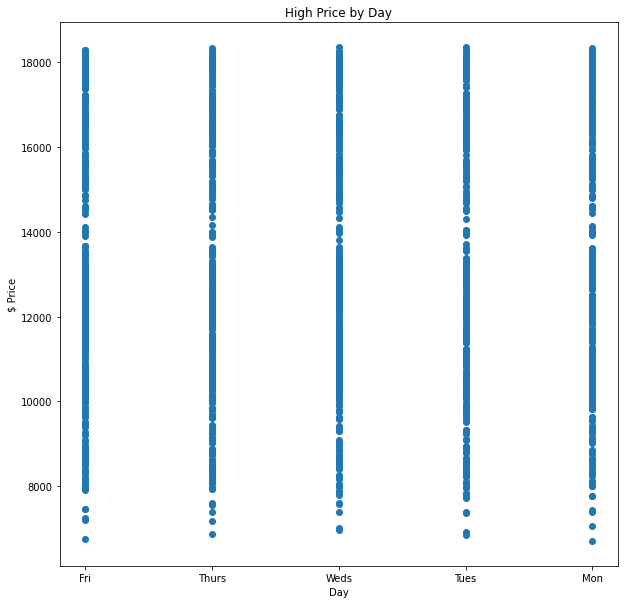

In [188]:
plt.figure(figsize=(10,10))
plt.scatter(df['Day'], df['High'])
plt.xlabel("Day")
plt.ylabel("$ Price")
plt.title('High Price by Day')
plt.show

In [195]:
df.to_csv('cleaned_data.csv',index=False)

In [198]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [199]:
df.to_csv('/content/drive/My Drive/cleaned_data.csv',index=False)

In [212]:
import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import preprocessing, svm 
import numpy as np



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [214]:
#predicting stock price
# df['Stock Prediction']=df['Close'].shift(-1)
# df.dropna(inplace =True)

# X = np.array(df.drop(['Stock Prediction'],1))
# Y = np.array(df['Stock Prediction'])

X = df['High']
Y = df['Low']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 50)
X_train_sm = sm.add_constant(X_train)
log_reg = sm.OLS(Y_train, X_train_sm).fit()

Pred_Y_train = log_reg.predict(X_train_sm)
Pred_Y_train

1589    10437.074500
931     13396.310336
1514    10025.854591
1390    11395.276804
1535    10088.324066
            ...     
1313    12165.840457
109     16078.232251
1931     9184.565675
1504    10232.403081
1712     9453.211363
Length: 1389, dtype: float64

In [215]:
X_test_sm = sm.add_constant(X_test)
Pred_Y_test = log_reg.predict(X_test_sm)
Pred_Y_test

1665    10257.322294
707     15166.898953
537     16467.341699
954     13488.192829
719     14864.897025
            ...     
466     16999.938432
884     12975.058475
464     16965.087195
1136    12128.060948
1906     8450.898838
Length: 596, dtype: float64

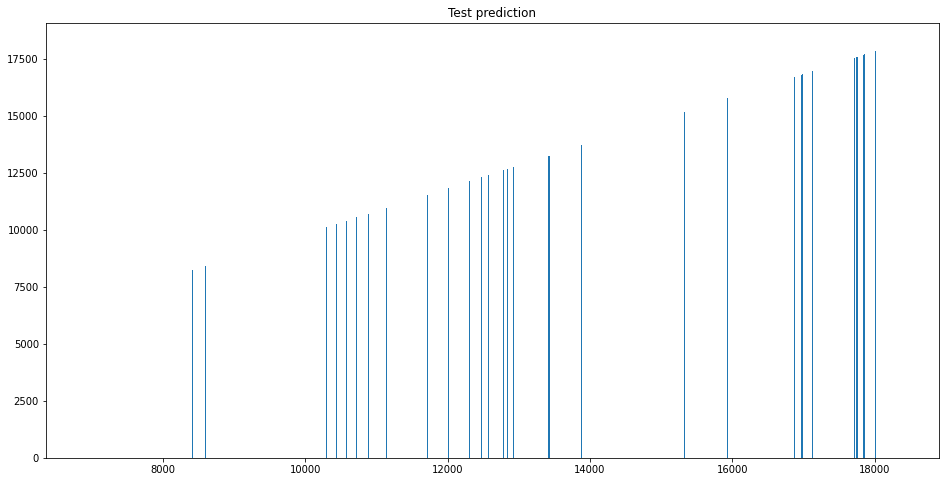

In [226]:
plt.figure(figsize=(16,8))
plt.bar(X_test, Pred_Y_test)
plt.title('Test prediction')
plt.show()

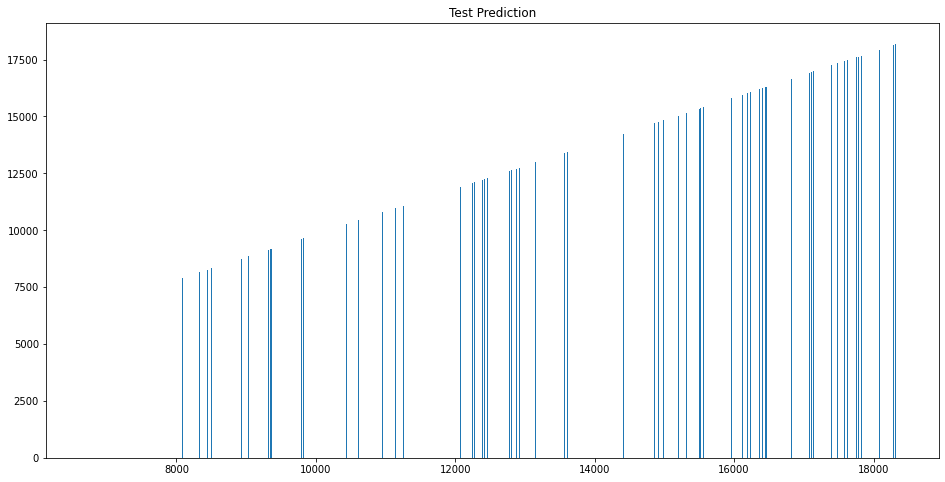

In [225]:
plt.figure(figsize=(16,8))
plt.bar(X_train, Pred_Y_train)
plt.title('Test Prediction')
plt.show()